In [4]:
import random
import numpy as np

## 1. Task

In [179]:
SEED = 42
POP_CNT = 1000
MUTATION_RATE = 0.1
EPOCHS = 100

In [3]:
random.seed(SEED)

In [196]:
def generate_pop(size: int):
    return np.random.uniform(-10, 10, [size, 2])


def apply_func(population):
    result = np.zeros(POP_CNT)
    for i in range(population.shape[0]):
        el = population[i]
        result[i] = f(el[0], el[1])

    return result


def parent_selection(applied_func):
    return applied_func[np.random.choice(applied_func.size, 2, replace=False)]


# методом точки разрыва
def crossover(parent1, parent2):
    return np.array([parent1[0], parent2[1]])


def mutation(individual, mutation_rate=0.1, epsilon=0.5):
    mutated_individual = individual[:]

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutated_individual[i] += random.uniform(-epsilon, epsilon)

    return mutated_individual

## a)

In [26]:
def f(x, y):
    return 3 * (1 - x) ** 2 * np.exp(-x ** 2 - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2) - 1.0 / 3 * np.exp(-(x + 1) ** 2 - y ** 2)

In [217]:
def process_algo(fuction_to: str):
    """
    fuction_to: maximize or minimize
    """
    population = generate_pop(POP_CNT)
 
    applied_func = apply_func(population)
    
    parents = parent_selection(applied_func)
    
    max_value = np.max(applied_func)
    
    for i in range(EPOCHS):
        parents = parent_selection(applied_func)
        
        mutated_individual = mutation(crossover(parents, parents), mutation_rate=0.2, epsilon=0.5)
        f_mutated = f(mutated_individual[0], mutated_individual[1])
        
        if f_mutated > max_value:
            max_value = f_mutated
        worst_idx = np.argmin(applied_func) # худший
        
        population[worst_idx] = mutated_individual
        applied_func[worst_idx] = f_mutated

In [218]:
max_value

7.637333670284596

In [162]:
idx_min = np.argmin(applied_func)
applied_func[idx_min]

-4.81483670715593

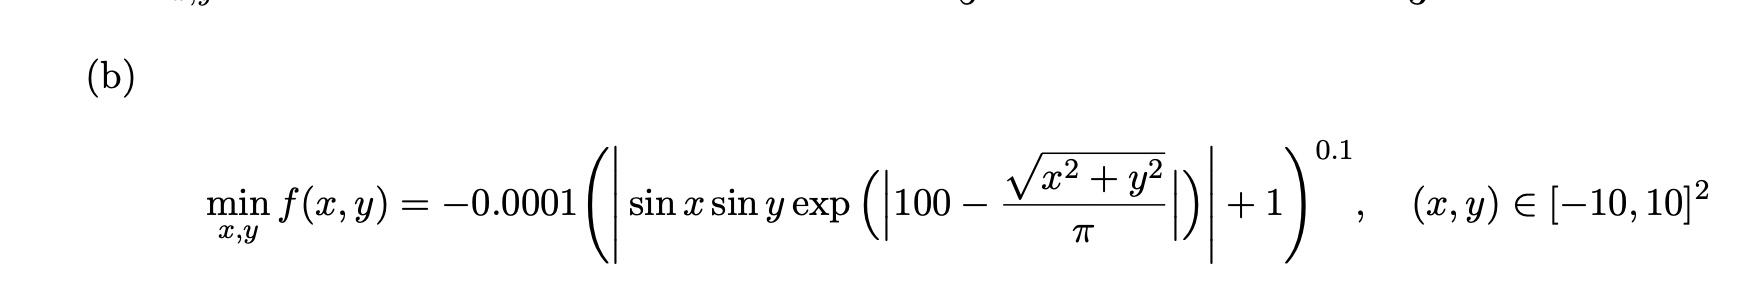

### b)

In [224]:
# Проверить
def f(x, y):
    return -0.0001 * (np.abs(np.sin(x) * np.sin(y) * np.exp(np.abs(100 - np.sqrt(x ** 2 + y ** 2) / np.pi))) + 1) ** 0.1

## 3

In [220]:
distance_matrix = [
      [0, 5.48, 7.76, 6.96, 5.82, 2.74, 5.02, 1.94, 3.08, 1.94, 5.36, 5.02, 3.88, 3.54, 4.68, 7.76, 6.62],
      [5.48, 0, 6.84, 3.08, 1.94, 5.02, 7.30, 3.54, 6.96, 7.42, 10.84, 5.94, 4.80, 6.74, 10.16, 8.68, 12.10],
      [7.76, 6.84, 0, 9.92, 8.78, 5.02, 2.74, 8.10, 4.68, 7.42, 4.00, 12.78, 11.64, 11.30, 7.88, 15.52, 7.54],
      [6.96, 3.08, 9.92, 0, 1.14, 6.50, 8.78, 5.02, 8.44, 8.90, 12.32, 5.14, 6.28, 8.22, 11.64, 5.60, 13.58],
      [5.82, 1.94, 8.78, 1.14, 0, 5.36, 7.64, 3.88, 7.30, 7.76, 11.18, 4.00, 5.14, 7.08, 10.50, 6.74, 12.44],
      [2.74, 5.02, 5.02, 6.50, 5.36, 0, 2.28, 3.08, 1.94, 2.40, 5.82, 7.76, 6.62, 6.28, 5.14, 10.50, 7.08],
      [5.02, 7.30, 2.74, 8.78, 7.64, 2.28, 0, 5.36, 1.94, 4.68, 3.54, 10.04, 8.90, 8.56, 5.14, 12.78, 4.80],
      [1.94, 3.54, 8.10, 5.02, 3.88, 3.08, 5.36, 0, 3.42, 3.88, 7.30, 4.68, 3.54, 3.20, 6.62, 7.42, 8.56],
      [3.08, 6.96, 4.68, 8.44, 7.30, 1.94, 1.94, 3.42, 0, 2.74, 3.88, 8.10, 6.96, 6.62, 3.20, 10.84, 5.14],
      [1.94, 7.42, 7.42, 8.90, 7.76, 2.40, 4.68, 3.88, 2.74, 0, 3.42, 5.36, 4.22, 3.88, 2.74, 8.10, 4.68],
      [5.36, 10.84, 4.00, 12.32, 11.18, 5.82, 3.54, 7.30, 3.88, 3.42, 0, 8.78, 7.64, 7.30, 3.88, 11.52, 3.54],
      [5.02, 5.94, 12.78, 5.14, 4.00, 7.76, 10.04, 4.68, 8.10, 5.36, 8.78, 0, 1.14, 3.08, 6.50, 2.74, 8.44],
      [3.88, 4.80, 11.64, 6.28, 5.14, 6.62, 8.90, 3.54, 6.96, 4.22, 7.64, 1.14, 0, 1.94, 5.36, 3.88, 7.30],
      [3.54, 6.74, 11.30, 8.22, 7.08, 6.28, 8.56, 3.20, 6.62, 3.88, 7.30, 3.08, 1.94, 0, 3.42, 4.22, 5.36],
      [4.68, 10.16, 7.88, 11.64, 10.50, 5.14, 5.14, 6.62, 3.20, 2.74, 3.88, 6.50, 5.36, 3.42, 0, 7.64, 1.94],
      [7.76, 8.68, 15.52, 5.60, 6.74, 10.50, 12.78, 7.42, 10.84, 8.10, 11.52, 2.74, 3.88, 4.22, 7.64, 0, 7.98],
      [6.62, 12.10, 7.54, 13.58, 12.44, 7.08, 4.80, 8.56, 5.14, 4.68, 3.54, 8.44, 7.30, 5.36, 1.94, 7.98, 0]
    ] #(in km)
flower_market_id = 0
demands = [0, 100, 100, 200, 400, 200, 400, 800, 800, 100, 200, 100, 200, 400, 400, 800, 800]

# max  grade 8
num_couriers = 4
salary_per_km = 100
courier_max_load = [2500, 2000, 1000, 500]

In [222]:
len(distance_matrix[0])
len(demands)

17